<a href="https://colab.research.google.com/github/sana1410/Natural-Language-Processing/blob/main/Music_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Datasets and library **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn_pandas

train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
metadata1=pd.read_csv('/content/meta_data_1.csv')
metadata2=pd.read_csv('/content/meta_data_2.csv')

In [2]:
train.head()

song_id                                              album  \
0  AA5aMeYP1klLv1BA  Stormy Monday Blues (Sun Records 70th / Remast...   
1  Wr3MLRGLm08yjrGN                                   For All The Dogs   
2  XtEbP8zIOloM6r5I        Break Out (1983 Version - Expanded Edition)   
3  NW5kIVzyoiV0zJmJ                                  Legends Never Die   
4  1uhYBNywheqCdzrg                              Everything’s Not Lost   

                artist                                             lyrics  \
0        T-Bone Walker                                                NaN   
1                Drake  59 ContributorsTranslationsEspañolEnglishPortu...   
2  The Pointer Sisters  5 ContributorsInvestigation of the Ferguson Po...   
3           Bad Wolves  3 ContributorsLegends Never Die Lyrics(Yea)\n\...   
4       Gregory Porter                                                NaN   

                                  track target  
0  That Evening Train - Remastered 2022  Blues  
1                      Bahamas Promises    R&B  
2         Automatic - 12" Special Remix  Disco  
3                     Legends Never Die   Rock  
4                 Everything’s Not Lost   Jazz

Dropped columns not required

In [3]:
train=train[['song_id','lyrics','target']]

In [4]:
test=test[['song_id','lyrics']]

Combining metadata1 and metadat2

In [5]:
metadata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269 entries, 0 to 8268
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      8269 non-null   object 
 1   a1      8142 non-null   float64
 2   a10     8269 non-null   float64
 3   a11     8004 non-null   float64
 4   a12     7908 non-null   float64
 5   a13     7331 non-null   float64
 6   a14     7621 non-null   float64
 7   a15     7771 non-null   float64
 8   a16     7793 non-null   float64
 9   a17     8142 non-null   float64
 10  a18     8269 non-null   float64
 11  a19     7771 non-null   float64
 12  a2      7908 non-null   float64
 13  a20     7727 non-null   float64
 14  a21     8040 non-null   float64
 15  a22     8004 non-null   float64
 16  a23     7771 non-null   float64
 17  a24     7621 non-null   float64
 18  a25     7949 non-null   float64
 19  a26     8004 non-null   float64
 20  a27     7556 non-null   float64
 21  a28     7291 non-null   float64
 22  

In [6]:
metadata2.isna().sum()

id        0
a1      127
a10       0
a11     265
a12     361
a13     938
a14     648
a15     498
a16     476
a17     127
a18       0
a19     498
a2      361
a20     542
a21     229
a22     265
a23     498
a24     648
a25     320
a26     265
a27     713
a28     978
a29       0
a3      648
a30       0
a31     265
a32     938
a33     713
a34       0
a35     265
a36     978
a37     229
a38     320
a39     361
a4      498
a40     648
a41     265
a42     389
a43     498
a44       0
a45     582
a46     361
a47    1112
a48     320
a49     265
a5      577
a50     229
a6      320
a7      498
a8      229
a9        0
dtype: int64

In [7]:
metadata1.head()

id  adaptibility  danceability  duration  energy  explicit  \
0  VKpqYUqyes6tjxUE             0          47.8  648405.0    2.94     False   
1  Bd8ufO7wOFegZXVz            10          71.0  347181.0   97.90     False   
2  RbsK7ydOf0CWomVN             2          53.9  447695.0   47.00      True   
3  mYx3izxEyO3axauu             7           NaN  376005.0   47.00     False   
4  ECLOwMMomoDb6IM6             0          56.5  408671.0   52.60     False   

   happening  instrumentalness  loudness  mode  naturality  positiveness  \
0      0.105          0.948000   -45.638     6     0.99300        0.1480   
1      0.105          0.754000    -6.366     5     0.00263        0.5940   
2      0.124          0.000000   -12.164     5     0.29900        0.3840   
3      0.131          0.000001    -7.840     5     0.13700        0.0569   
4      0.110          0.000119   -17.704     6     0.03390        0.6370   

  release_date  reputation  speechiness    tempo  time_signature  total_tracks  
0         1962          61       0.0453  124.308               3            10  
1   2019-04-17          53       0.0580  145.994               4             1  
2   2023-09-29          56       0.0652  129.676               4            17  
3   2023-09-15          61       0.0329  120.006               4             1  
4         1971          62       0.0365  167.936               4            10

In [8]:
metadata1['explicit']=metadata1['explicit'].astype('str')

In [9]:
metadata1['explicit']=metadata1['explicit'].replace({'False':0,'True':1})

In [10]:
metadata1['release_date_year']=metadata1['release_date'].str.split('-').str[0].astype('int')

In [11]:
from datetime import datetime

current_date = datetime.now().year

In [12]:
metadata1['song_age']=current_date-metadata1['release_date_year']

In [13]:
metadata1.drop(['release_date','release_date_year'],axis=1,inplace=True)

In [14]:
metadata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269 entries, 0 to 8268
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8269 non-null   object 
 1   adaptibility      8269 non-null   int64  
 2   danceability      7949 non-null   float64
 3   duration          8142 non-null   float64
 4   energy            7771 non-null   float64
 5   explicit          8269 non-null   int64  
 6   happening         8269 non-null   float64
 7   instrumentalness  8269 non-null   float64
 8   loudness          7621 non-null   float64
 9   mode              8269 non-null   int64  
 10  naturality        8269 non-null   float64
 11  positiveness      8004 non-null   float64
 12  reputation        8269 non-null   int64  
 13  speechiness       8040 non-null   float64
 14  tempo             7908 non-null   float64
 15  time_signature    8269 non-null   int64  
 16  total_tracks      8269 non-null   int64  


In [15]:
metadata1.isna().sum()

id                    0
adaptibility          0
danceability        320
duration            127
energy              498
explicit              0
happening             0
instrumentalness      0
loudness            648
mode                  0
naturality            0
positiveness        265
reputation            0
speechiness         229
tempo               361
time_signature        0
total_tracks          0
song_age              0
dtype: int64

In [16]:
metadata1_2=pd.merge(metadata1,metadata2,how='inner',on='id')

In [17]:
metadata1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8269 entries, 0 to 8268
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8269 non-null   object 
 1   adaptibility      8269 non-null   int64  
 2   danceability      7949 non-null   float64
 3   duration          8142 non-null   float64
 4   energy            7771 non-null   float64
 5   explicit          8269 non-null   int64  
 6   happening         8269 non-null   float64
 7   instrumentalness  8269 non-null   float64
 8   loudness          7621 non-null   float64
 9   mode              8269 non-null   int64  
 10  naturality        8269 non-null   float64
 11  positiveness      8004 non-null   float64
 12  reputation        8269 non-null   int64  
 13  speechiness       8040 non-null   float64
 14  tempo             7908 non-null   float64
 15  time_signature    8269 non-null   int64  
 16  total_tracks      8269 non-null   int64  


In [18]:
metadata1_2=metadata1_2.replace([np.inf, -np.inf], np.nan)


In [19]:
metadata1_2.isna().sum()

id                0
adaptibility      0
danceability    320
duration        127
energy          498
               ... 
a50             229
a6              320
a7              498
a8              229
a9                0
Length: 68, dtype: int64

KNN imputation

In [20]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=10)
metadata1_2_imputed=pd.DataFrame(knn.fit_transform(metadata1_2.iloc[:,1:]),columns=metadata1_2.iloc[:,1:].columns.to_list())

In [21]:
metadata1_2_imputed=pd.concat([metadata1_2.iloc[:,0],metadata1_2_imputed],axis=1)

In [22]:
metadata1_2_imputed.isna().sum()

id              0
adaptibility    0
danceability    0
duration        0
energy          0
               ..
a50             0
a6              0
a7              0
a8              0
a9              0
Length: 68, dtype: int64

In [23]:
train=train.drop_duplicates()

In [24]:
train.shape

(4961, 3)

In [25]:
train.isna().sum()

song_id      0
lyrics     658
target       0
dtype: int64

In [26]:
train.dropna(inplace=True)

In [27]:
train.isna().sum()

song_id    0
lyrics     0
target     0
dtype: int64

In [28]:
test.isna().sum()

song_id      0
lyrics     485
dtype: int64

In [29]:
test.dropna(inplace=True)

In [30]:
test.shape

(2823, 2)

In [31]:
train_metadata1=pd.merge(left=train,right=metadata1_2_imputed,how='inner',left_on='song_id',right_on='id')

In [32]:
train_metadata1.head()

song_id                                             lyrics  \
0  Wr3MLRGLm08yjrGN  59 ContributorsTranslationsEspañolEnglishPortu...   
1  XtEbP8zIOloM6r5I  5 ContributorsInvestigation of the Ferguson Po...   
2  NW5kIVzyoiV0zJmJ  3 ContributorsLegends Never Die Lyrics(Yea)\n\...   
3  fyKA5eI6JWQiTBju  6 ContributorsDancin’ In The Country Lyrics[Ve...   
4  Bdpl6SJGn3YPwFt9  3 ContributorsDon’t Go to Strangers Lyrics[Ver...   

    target                id  adaptibility  danceability  duration  energy  \
0      R&B  Wr3MLRGLm08yjrGN           1.0          62.6  368183.0    30.9   
1    Disco  XtEbP8zIOloM6r5I           5.0          77.6  732725.0    66.9   
2     Rock  NW5kIVzyoiV0zJmJ           5.0          37.1  355317.0    91.6   
3  Country  fyKA5eI6JWQiTBju           7.0          65.7  359285.0    87.1   
4     Jazz  Bdpl6SJGn3YPwFt9           7.0          49.7  456725.0     8.6   

   explicit  happening  ...           a46       a47       a48    a49       a5  \
0       1.0     0.1170  ...  1.110734e-07 -488.0346  187.4490  0.738 -248.924   
1       0.0     0.0863  ...  1.646928e-07 -844.4118  232.5411  1.830 -306.740   
2       1.0     0.1340  ...  1.537279e-07 -376.2928  110.8980  0.638 -147.124   
3       0.0     0.1020  ...  0.000000e+00 -368.2588  196.7940  1.064 -260.672   
4       0.0     0.1240  ...  8.195961e-06 -190.5588  148.7280  0.342 -198.116   

      a50      a6          a7       a8       a9  
0  0.2948  14.376    3.251403  0.02165  2.55000  
1  0.0804  88.576   75.251403  0.03310  0.07080  
2 -0.0640  64.811  124.651403  0.07500  0.00417  
3  0.1380  93.393  115.651403  0.03375  0.00930  
4  0.3188  63.473  -41.348597  0.02215  2.92200  

[5 rows x 71 columns]

In [33]:
train_metadata1.drop('id',inplace=True,axis=1)

In [34]:
test_metadata1=pd.merge(left=test,right=metadata1_2_imputed,how='inner',left_on='song_id',right_on='id')

In [35]:
test_metadata1.head()

song_id                                             lyrics  \
0  7c61FpilqRU/3Ley  17 ContributorsBroken Halos Lyrics[Refrain]\nS...   
1  EmqUjbC3coby/LZy  2 ContributorsVogue Lyrics[Verse]\nIt's giving...   
2  lvF5H8aYwo+TlFJe  3 ContributorsAll of the good songs except the...   
3  O+oGRFmYSUbebxCK  5 ContributorsNe Me Quitte Pas (Don’t Leave Me...   
4  rUR7HzUw1p41lUUn  158 ContributorsTranslationsEspañolFrançaisNee...   

                 id  adaptibility  danceability  duration  energy  explicit  \
0  7c61FpilqRU/3Ley           8.0          61.3  361817.0   56.40       0.0   
1  EmqUjbC3coby/LZy           6.0          74.5  384379.0   93.20       0.0   
2  lvF5H8aYwo+TlFJe           2.0          69.7  279451.0    4.45       0.0   
3  O+oGRFmYSUbebxCK           6.0          61.7  337497.0   50.00       1.0   
4  rUR7HzUw1p41lUUn           5.0          67.1  383205.0   31.40       1.0   

   happening  instrumentalness  ...           a46       a47       a48    a49  \
0     0.0585          0.000002  ...  2.104914e-08 -517.1880  183.7245  1.076   
1     0.1360          0.056100  ...  4.382812e-04 -464.5088  223.0920  1.856   
2     0.1030          0.927000  ...  7.989451e-03 -179.4240  208.7910  0.326   
3     0.1070          0.005210  ...  5.787217e-05 -324.7000  184.7790  1.032   
4     0.0825          0.000000  ...  0.000000e+00 -351.1148  201.0525  0.592   

        a5     a50      a6          a7       a8     a9  
0 -243.048  0.1336  46.397   54.251403  0.01255  0.402  
1 -294.288  0.3412  93.625  127.851403  0.02535  0.333  
2 -278.148  0.2524   8.873  -49.648597  0.01995  2.775  
3 -244.736  0.2920  85.113   41.451403  0.01700  1.158  
4 -267.216 -0.6460  11.711    4.251403  0.12200  0.330  

[5 rows x 70 columns]

In [36]:
test_metadata1.drop('id',inplace=True,axis=1)

In [37]:
train_metadata1['target'].value_counts()

Metal        492
Indie        425
Rock         422
R&B          354
Blues        344
Pop          319
Soul         307
Country      295
Lofi         229
Disco        212
HipHop       194
Funk         192
EDM          189
Jazz         175
Ambient      133
Classical     21
Name: target, dtype: int64

Replace '\n' with '.' in text

In [38]:
import re
def total_sentences(text):
  lines=len(re.findall(r'\n',text))
  return lines

In [39]:
train_metadata1['lyrics'][246]

"7 ContributorsBeppo LyricsI.\n'Tis known, at least it should be, that throughout\nAll countries of the Catholic persuasion,\nSome weeks before Shrove Tuesday comes about,\nThe People take their fill of recreation,\nAnd buy repentance, ere they grow devout,\nHowever high their rank, or low their station,\nWith fiddling, feasting, dancing, drinking, masking,\nAnd other things which may be had for asking.\n\nII.\nThe moment Night with dusky mantle covers\nThe skies (and the more duskily the better),\nThe Time--less liked by husbands than by lovers--\nBegins, and Prudery flings aside her fetter,\nAnd Gaiety on restless tiptoe hovers,\nGiggling with all the Gallants who beset her;\nAnd there are Songs and quavers, roaring, humming,\nGuitars, and every other sort of strumming.\n\nIII.\nAnd there are dresses, splendid but fantastical,\nMasks of all times and nations, Turks and Jews,\nAnd Harlequins and Clowns, with feats gymnastical,\nGreeks, Romans, Yankee-doodles, and Hindoos;\nAll kinds o

In [40]:
total_sentences(train_metadata1['lyrics'][246])

985

In [41]:
train_metadata1['lines']=train_metadata1['lyrics'].apply(total_sentences)

In [42]:
test_metadata1['lines']=test_metadata1['lyrics'].apply(total_sentences)

In [43]:
train_metadata1.head()

song_id                                             lyrics  \
0  Wr3MLRGLm08yjrGN  59 ContributorsTranslationsEspañolEnglishPortu...   
1  XtEbP8zIOloM6r5I  5 ContributorsInvestigation of the Ferguson Po...   
2  NW5kIVzyoiV0zJmJ  3 ContributorsLegends Never Die Lyrics(Yea)\n\...   
3  fyKA5eI6JWQiTBju  6 ContributorsDancin’ In The Country Lyrics[Ve...   
4  Bdpl6SJGn3YPwFt9  3 ContributorsDon’t Go to Strangers Lyrics[Ver...   

    target  adaptibility  danceability  duration  energy  explicit  happening  \
0      R&B           1.0          62.6  368183.0    30.9       1.0     0.1170   
1    Disco           5.0          77.6  732725.0    66.9       0.0     0.0863   
2     Rock           5.0          37.1  355317.0    91.6       1.0     0.1340   
3  Country           7.0          65.7  359285.0    87.1       0.0     0.1020   
4     Jazz           7.0          49.7  456725.0     8.6       0.0     0.1240   

   instrumentalness  ...       a47       a48    a49       a5     a50      a6  \
0          0.000013  ... -488.0346  187.4490  0.738 -248.924  0.2948  14.376   
1          0.000018  ... -844.4118  232.5411  1.830 -306.740  0.0804  88.576   
2          0.000025  ... -376.2928  110.8980  0.638 -147.124 -0.0640  64.811   
3          0.000000  ... -368.2588  196.7940  1.064 -260.672  0.1380  93.393   
4          0.001060  ... -190.5588  148.7280  0.342 -198.116  0.3188  63.473   

           a7       a8       a9  lines  
0    3.251403  0.02165  2.55000     33  
1   75.251403  0.03310  0.07080    908  
2  124.651403  0.07500  0.00417     64  
3  115.651403  0.03375  0.00930     68  
4  -41.348597  0.02215  2.92200     26  

[5 rows x 71 columns]

Text(0.5, 1.0, 'Barplots for no of lines for each song type')

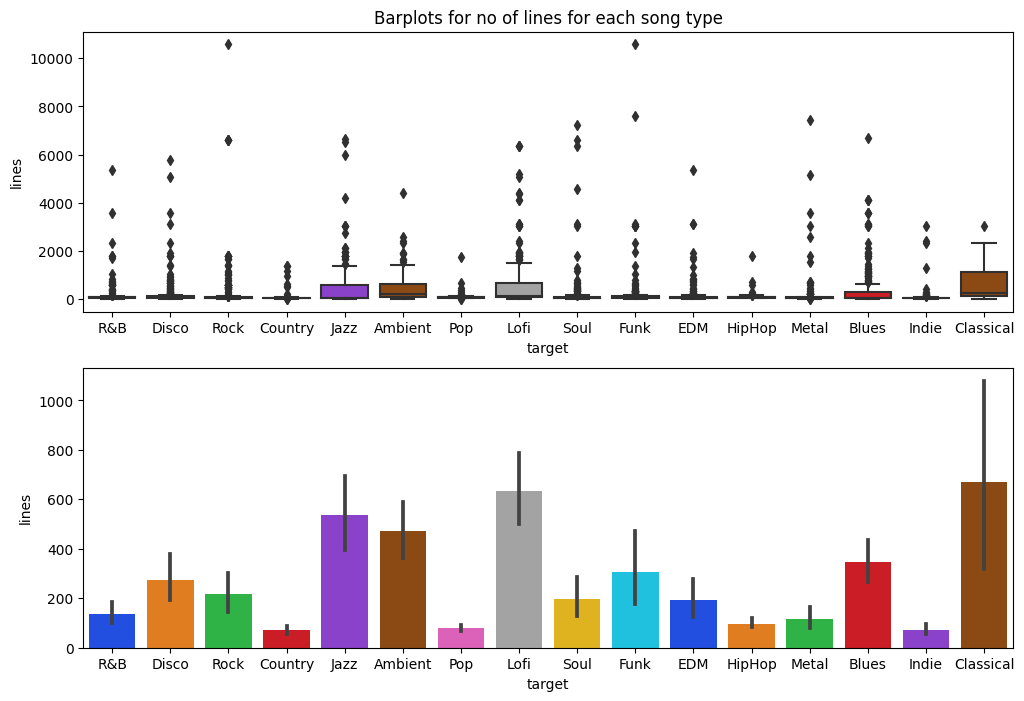

In [44]:
fig, axes= plt.subplots(2,1,figsize=(12,8))

sns.boxplot(x='target',y='lines',data=train_metadata1,palette='bright',ax=axes[0])
axes[0].set_title("Boxplots for no of lines for each song type")
sns.barplot(x='target',y='lines',data=train_metadata1,palette='bright',ax=axes[1])
axes[0].set_title("Barplots for no of lines for each song type")


**TEXT PRE-PROCESSING **

* STEP1:- DE-CAPITALIZE EACH WORD
* STEP 2 :- REMOVE NON_CHARACTER WORDS
* STEP 3:-REMOVING PUNCTUATION
* STEP 4 - STOP WORDS REMOVAL
* STEP 5 - TOKENISATION
* STEP 6 - STEMMIN /LEMMETISATION


In [45]:
train_metadata1['lyrics'][278]

"19 ContributorsDance Like We’re Making Love Lyrics[Verse 1]\nSweat dripping from my body\nWe both at this party\nSo come and show me your moves\nI got some things I can teach too\nIf you wanna see, oh\nYou say you a need a shot of the Henny\nThen you're ready, do what you need to do\n'Cause I'll be waiting for you\nIt's about to get hot and heavy\n\n[Pre-Chorus]\nIt's really late\nYou're getting close, and the lights are off\nYour body's in sync to the beat of my heart\nAnd I can feel your nature rising while I wind on you\n\n[Chorus]\nLet's dance like we're making lo-o-o-o-o-o-ove\nMa-a-king lo-o-o-o-ove\nLet's dance like we're making lo-o-o-o-o-o-ove\nMa-a-king lo-o-o-o-ove\nLet's dance like we're making love\n\n[Verse 2]\nIf we're down just maybe, we dance like we're making babies\nAs soon as our song comes on\n'Cause boy, we got all night long\nSo if you ready, I'm ready, to get it, come on\nI see a little faded\nYou wanna get crazy out on this floor\nI hope you sure this is what 

In [46]:
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words=stopwords.words('english')
exclude=string.punctuation
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
def text_tranformation(text):
  text=text.lower()                   #convert to lower string
  text=re.sub(r'\W+',' ',text)        #replace non-word characters
  words=nltk.word_tokenize(text)      #word tokenisation
  y=[]
  for word in words:
    if word not in stop_words:        #stopword removal
      y.append(word)
  text=' '.join(y)

  for char in exclude:                #remove punctuation
    text=text.replace(char,' ')
  words=nltk.word_tokenize(text)
  y=[]
  for word in words:
    y.append(stemmer.stem(word))      #stemming
  return ' '.join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
text_tranformation(train_metadata1['lyrics'][256])

'1 contributorfootprint 2000 remast lyric music wayn shorter thousand year histori record deep jungl woman step wet clay print remain futur remind age ago mani live later travel cross path vine saw trace footprint silent testimoni spiritu journey begun long ago eon chang illus progress fear lead us soul power known earli age natur heartbeat rang loud earth key freedom lie think ancient intuit buri deep within us wait set free creator gift children must flow call past show us go closer may want show closer may realli know footprint ancient footprintsy might also likeemb'

In [49]:
train_metadata1['new_text']=train_metadata1['lyrics'].apply(text_tranformation)

In [50]:
test_metadata1['new_text']=test_metadata1['lyrics'].apply(text_tranformation)

Finding Patterns in text
* no of single character digits
* no of repeated words
* length of lyrics
* no of punctuations

Number of unique words

In [51]:
def unique_words(text):
  x=len(set(text))
  return x

In [52]:
unique_words(train_metadata1['new_text'][256])

27

In [53]:
train_metadata1['unique_words']=train_metadata1['new_text'].apply(unique_words)

In [54]:
test_metadata1['unique_words']=test_metadata1['new_text'].apply(unique_words)

In [55]:
train_metadata1.head()

song_id                                             lyrics  \
0  Wr3MLRGLm08yjrGN  59 ContributorsTranslationsEspañolEnglishPortu...   
1  XtEbP8zIOloM6r5I  5 ContributorsInvestigation of the Ferguson Po...   
2  NW5kIVzyoiV0zJmJ  3 ContributorsLegends Never Die Lyrics(Yea)\n\...   
3  fyKA5eI6JWQiTBju  6 ContributorsDancin’ In The Country Lyrics[Ve...   
4  Bdpl6SJGn3YPwFt9  3 ContributorsDon’t Go to Strangers Lyrics[Ver...   

    target  adaptibility  danceability  duration  energy  explicit  happening  \
0      R&B           1.0          62.6  368183.0    30.9       1.0     0.1170   
1    Disco           5.0          77.6  732725.0    66.9       0.0     0.0863   
2     Rock           5.0          37.1  355317.0    91.6       1.0     0.1340   
3  Country           7.0          65.7  359285.0    87.1       0.0     0.1020   
4     Jazz           7.0          49.7  456725.0     8.6       0.0     0.1240   

   instrumentalness  ...    a49       a5     a50      a6          a7       a8  \
0          0.000013  ...  0.738 -248.924  0.2948  14.376    3.251403  0.02165   
1          0.000018  ...  1.830 -306.740  0.0804  88.576   75.251403  0.03310   
2          0.000025  ...  0.638 -147.124 -0.0640  64.811  124.651403  0.07500   
3          0.000000  ...  1.064 -260.672  0.1380  93.393  115.651403  0.03375   
4          0.001060  ...  0.342 -198.116  0.3188  63.473  -41.348597  0.02215   

        a9  lines                                           new_text  \
0  2.55000     33  59 contributorstranslationsespañolenglishportu...   
1  0.07080    908  5 contributorsinvestig ferguson polic depart l...   
2  0.00417     64  3 contributorslegend never die lyric yea botto...   
3  0.00930     68  6 contributorsdancin countri lyric vers 1 neon...   
4  2.92200     26  3 contributorsdon go stranger lyric vers 1 bui...   

   unique_words  
0            29  
1            38  
2            24  
3            27  
4            26  

[5 rows x 73 columns]

Total number of words

In [56]:
def total_words(text):
  words=nltk.word_tokenize(text)
  return len(words)

In [57]:
total_words(train_metadata1['new_text'][256])

95

In [58]:
train_metadata1['total_words']=train_metadata1['new_text'].apply(total_words)

In [59]:
test_metadata1['total_words']=test_metadata1['new_text'].apply(total_words)

In [60]:
train_metadata1['ratio_unique_total']=train_metadata1['unique_words']/train_metadata1['total_words']

In [61]:
test_metadata1['ratio_unique_total']=test_metadata1['unique_words']/test_metadata1['total_words']

<Axes: xlabel='target', ylabel='unique_words'>

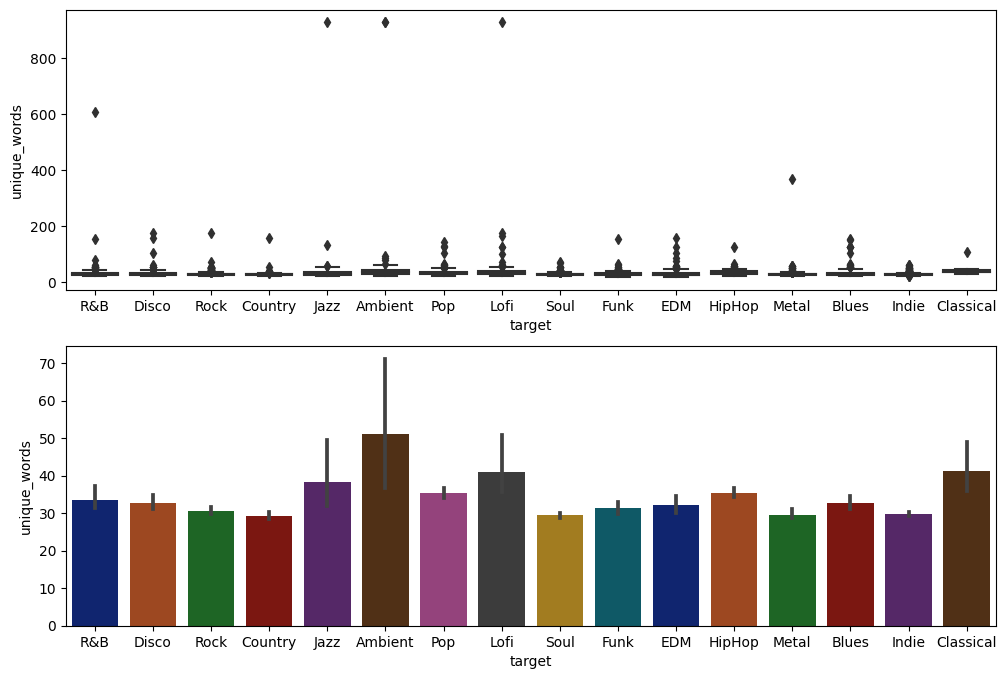

In [62]:
fig, axes= plt.subplots(2,1,figsize=(12,8))

sns.boxplot(x='target',y='unique_words',data=train_metadata1,palette='bright',ax=axes[0])
sns.barplot(x='target',y='unique_words',data=train_metadata1,palette='dark',ax=axes[1])

<Axes: xlabel='target', ylabel='ratio_unique_total'>

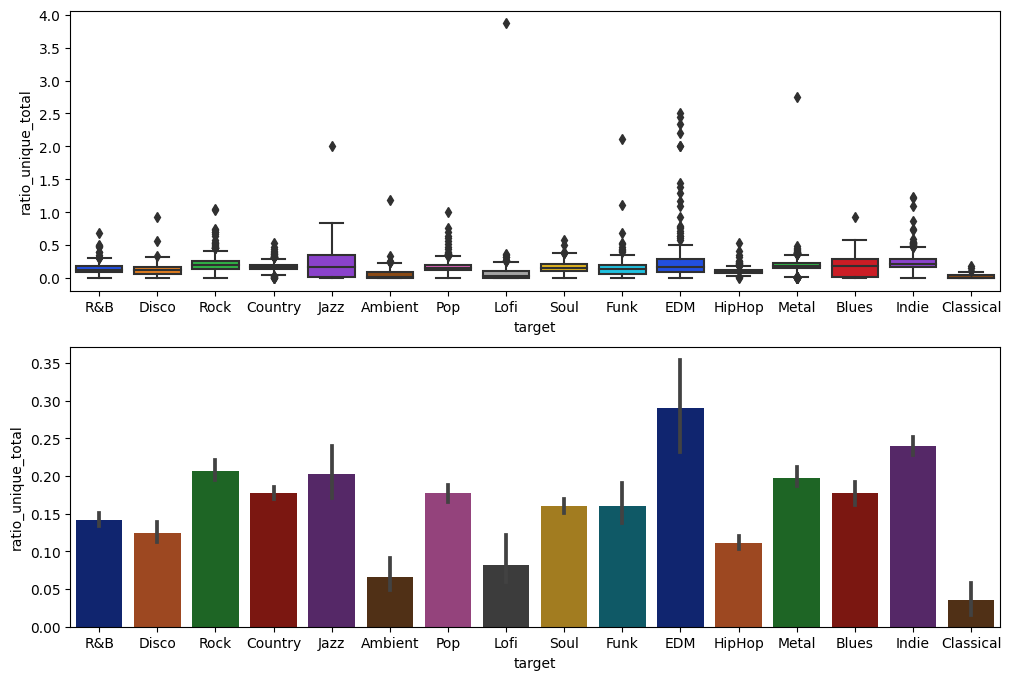

In [63]:
fig, axes= plt.subplots(2,1,figsize=(12,8))

sns.boxplot(x='target',y='ratio_unique_total',data=train_metadata1,palette='bright',ax=axes[0])
sns.barplot(x='target',y='ratio_unique_total',data=train_metadata1,palette='dark',ax=axes[1])

In [64]:
train_metadata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4303 entries, 0 to 4302
Data columns (total 75 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             4303 non-null   object 
 1   lyrics              4303 non-null   object 
 2   target              4303 non-null   object 
 3   adaptibility        4303 non-null   float64
 4   danceability        4303 non-null   float64
 5   duration            4303 non-null   float64
 6   energy              4303 non-null   float64
 7   explicit            4303 non-null   float64
 8   happening           4303 non-null   float64
 9   instrumentalness    4303 non-null   float64
 10  loudness            4303 non-null   float64
 11  mode                4303 non-null   float64
 12  naturality          4303 non-null   float64
 13  positiveness        4303 non-null   float64
 14  reputation          4303 non-null   float64
 15  speechiness         4303 non-null   float64
 16  tempo 

Normalization - MinMax Scaler

In [65]:
cols=train_metadata1.columns.to_list()

In [66]:
cols

['song_id',
 'lyrics',
 'target',
 'adaptibility',
 'danceability',
 'duration',
 'energy',
 'explicit',
 'happening',
 'instrumentalness',
 'loudness',
 'mode',
 'naturality',
 'positiveness',
 'reputation',
 'speechiness',
 'tempo',
 'time_signature',
 'total_tracks',
 'song_age',
 'a1',
 'a10',
 'a11',
 'a12',
 'a13',
 'a14',
 'a15',
 'a16',
 'a17',
 'a18',
 'a19',
 'a2',
 'a20',
 'a21',
 'a22',
 'a23',
 'a24',
 'a25',
 'a26',
 'a27',
 'a28',
 'a29',
 'a3',
 'a30',
 'a31',
 'a32',
 'a33',
 'a34',
 'a35',
 'a36',
 'a37',
 'a38',
 'a39',
 'a4',
 'a40',
 'a41',
 'a42',
 'a43',
 'a44',
 'a45',
 'a46',
 'a47',
 'a48',
 'a49',
 'a5',
 'a50',
 'a6',
 'a7',
 'a8',
 'a9',
 'lines',
 'new_text',
 'unique_words',
 'total_words',
 'ratio_unique_total']

In [67]:
data=train_metadata1[[ 'adaptibility',
 'danceability',
 'duration',
 'energy',
 'explicit',
 'happening',
 'instrumentalness',
 'loudness',
 'mode',
 'naturality',
 'positiveness',
 'reputation',
 'speechiness',
 'tempo',
 'time_signature',
 'total_tracks',
 'song_age',
 'a1',
 'a10',
 'a11',
 'a12',
 'a13',
 'a14',
 'a15',
 'a16',
 'a17',
 'a18',
 'a19',
 'a2',
 'a20',
 'a21',
 'a22',
 'a23',
 'a24',
 'a25',
 'a26',
 'a27',
 'a28',
 'a29',
 'a3',
 'a30',
 'a31',
 'a32',
 'a33',
 'a34',
 'a35',
 'a36',
 'a37',
 'a38',
 'a39',
 'a4',
 'a40',
 'a41',
 'a42',
 'a43',
 'a44',
 'a45',
 'a46',
 'a47',
 'a48',
 'a49',
 'a5',
 'a50',
 'a6',
 'a7',
 'a8',
 'a9',
 'lines',
 'unique_words',
 'total_words',
 'ratio_unique_total']]

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_scaled=pd.DataFrame(scaler.fit_transform(data),columns=data.columns.to_list())

In [69]:
test_scaled=pd.DataFrame(scaler.fit_transform(test_metadata1[data.columns.to_list()]),columns=data.columns.to_list())

In [70]:
train_scaled.head()

adaptibility  danceability  duration    energy  explicit  happening  \
0      0.090909      0.620962  0.123140  0.309295       1.0   0.104648   
1      0.454545      0.785761  0.304093  0.669663       0.0   0.072870   
2      0.454545      0.340804  0.116753  0.916915       1.0   0.122244   
3      0.636364      0.655021  0.118723  0.871869       0.0   0.089121   
4      0.636364      0.479235  0.167091  0.086068       0.0   0.111893   

   instrumentalness  loudness  mode  naturality  ...        a5       a50  \
0          0.000013  0.773072   1.0    0.853413  ...  0.378615  0.464778   
1          0.000018  0.809978   1.0    0.023694  ...  0.218824  0.430731   
2          0.000025  0.909038   1.0    0.001394  ...  0.659967  0.407800   
3          0.000000  0.907642   1.0    0.003111  ...  0.346146  0.439878   
4          0.001065  0.699027   1.0    0.977912  ...  0.519036  0.468589   

         a6        a7        a8        a9     lines  unique_words  \
0  0.143806  0.309295  0.024809  0.853413  0.003120      0.011013   
1  0.886044  0.669663  0.054400  0.023694  0.085847      0.020925   
2  0.648317  0.916915  0.162683  0.001394  0.006051      0.005507   
3  0.934229  0.871869  0.056080  0.003111  0.006429      0.008811   
4  0.634933  0.086068  0.026102  0.977912  0.002458      0.007709   

   total_words  ratio_unique_total  
0     0.001216            0.079659  
1     0.507542            0.000135  
2     0.002319            0.035953  
3     0.003195            0.029706  
4     0.000905            0.093265  

[5 rows x 71 columns]

In [71]:
train_scaled=pd.concat([train_scaled,train_metadata1['target']],axis=1)

In [72]:
test_scaled=pd.concat([test_scaled,test_metadata1['song_id']],axis=1)

In [73]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 72 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   adaptibility        4303 non-null   float64
 1   danceability        4303 non-null   float64
 2   duration            4303 non-null   float64
 3   energy              4303 non-null   float64
 4   explicit            4303 non-null   float64
 5   happening           4303 non-null   float64
 6   instrumentalness    4303 non-null   float64
 7   loudness            4303 non-null   float64
 8   mode                4303 non-null   float64
 9   naturality          4303 non-null   float64
 10  positiveness        4303 non-null   float64
 11  reputation          4303 non-null   float64
 12  speechiness         4303 non-null   float64
 13  tempo               4303 non-null   float64
 14  time_signature      4303 non-null   float64
 15  total_tracks        4303 non-null   float64
 16  song_a

In [74]:
test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 72 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   adaptibility        2823 non-null   float64
 1   danceability        2823 non-null   float64
 2   duration            2823 non-null   float64
 3   energy              2823 non-null   float64
 4   explicit            2823 non-null   float64
 5   happening           2823 non-null   float64
 6   instrumentalness    2823 non-null   float64
 7   loudness            2823 non-null   float64
 8   mode                2823 non-null   float64
 9   naturality          2823 non-null   float64
 10  positiveness        2823 non-null   float64
 11  reputation          2823 non-null   float64
 12  speechiness         2823 non-null   float64
 13  tempo               2823 non-null   float64
 14  time_signature      2823 non-null   float64
 15  total_tracks        2823 non-null   float64
 16  song_a

Check outliers

<Axes: >

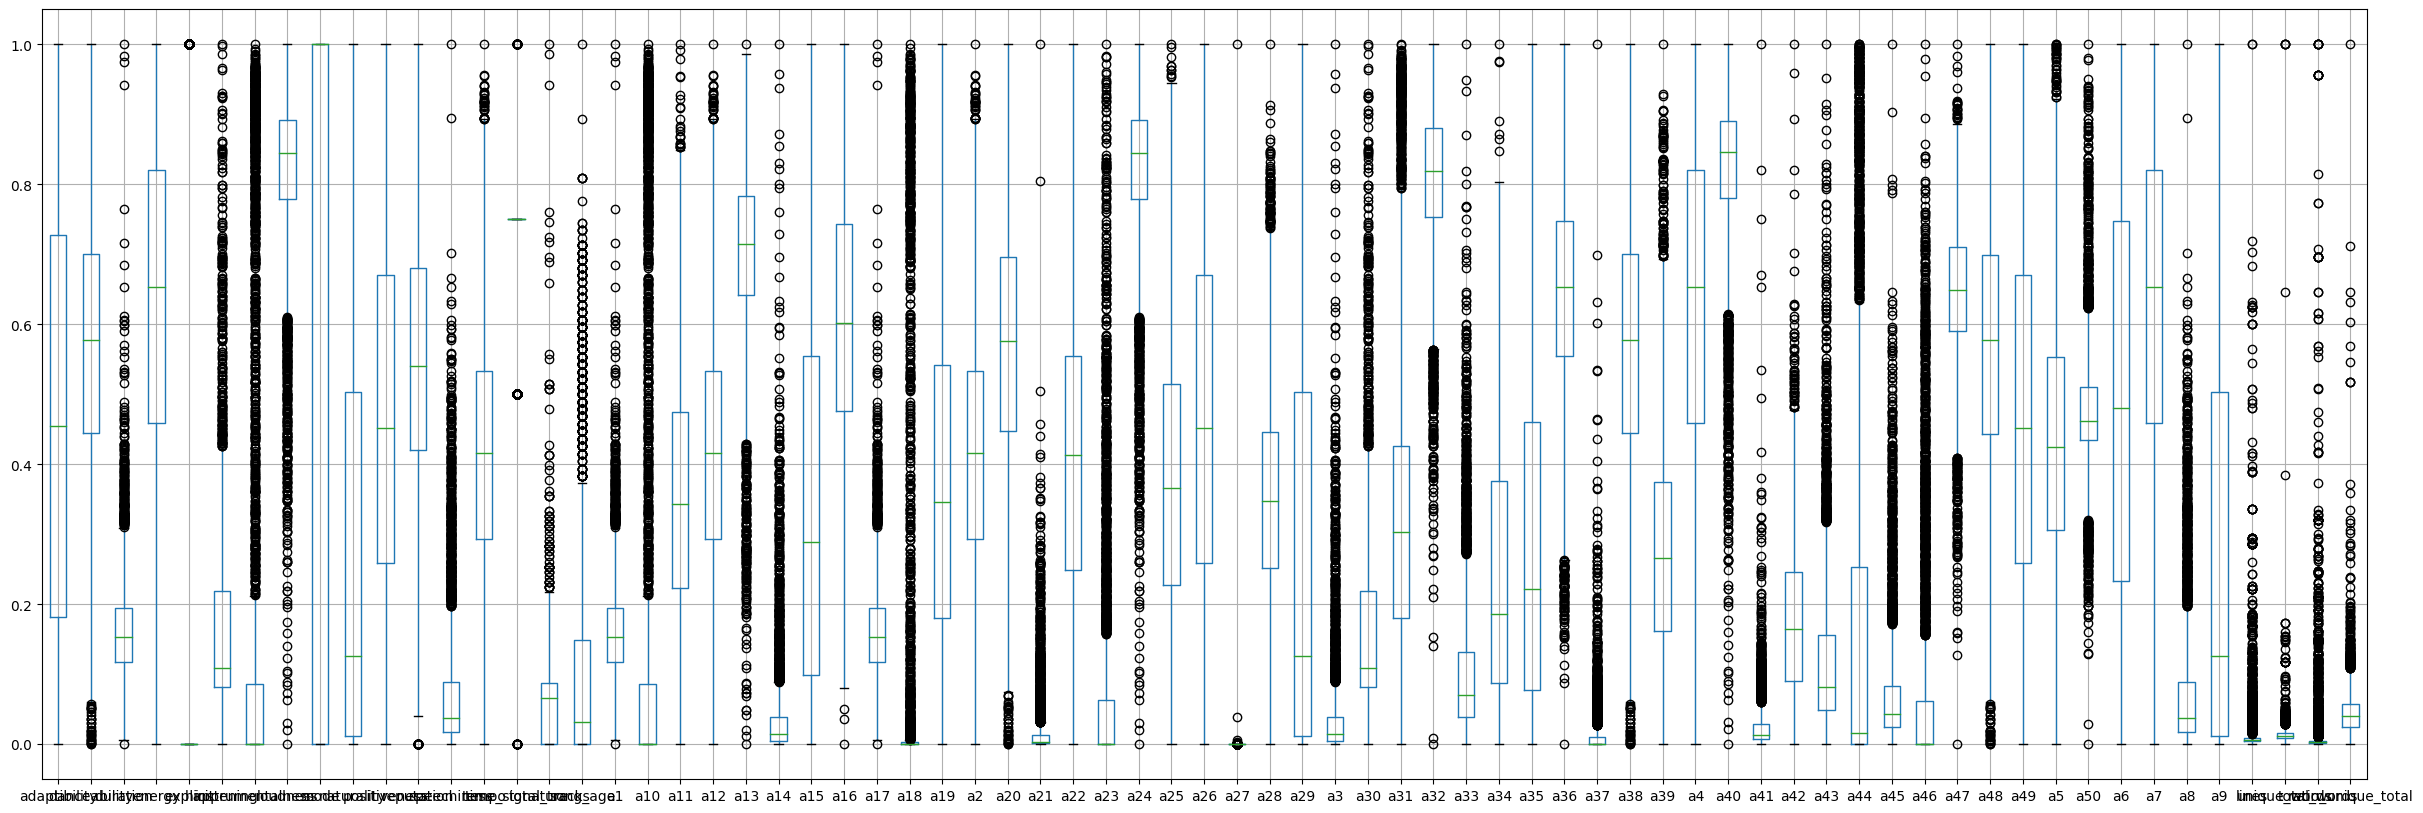

In [75]:
plt.figure(figsize=(30,10))
train_scaled.iloc[:,0:-1].boxplot()

In [76]:
train_scaled['target'].value_counts()

Metal        492
Indie        425
Rock         422
R&B          354
Blues        344
Pop          319
Soul         307
Country      295
Lofi         229
Disco        212
HipHop       194
Funk         192
EDM          189
Jazz         175
Ambient      133
Classical     21
Name: target, dtype: int64

In [77]:
train_scaled['target']=train_scaled['target'].replace({'Metal':0,'Indie':1,'Rock':2,'R&B':3,'Blues':4,'Pop':5,'Soul':6,'Country':7,
                                                       'Lofi':8,'Disco':9,'HipHop':10,'Funk':11,'EDM':12,'Jazz':13,'Ambient':14,
                                                       'Classical':15})

Correlation Matrix

In [78]:
matrix=train_scaled.corr()

<Axes: >

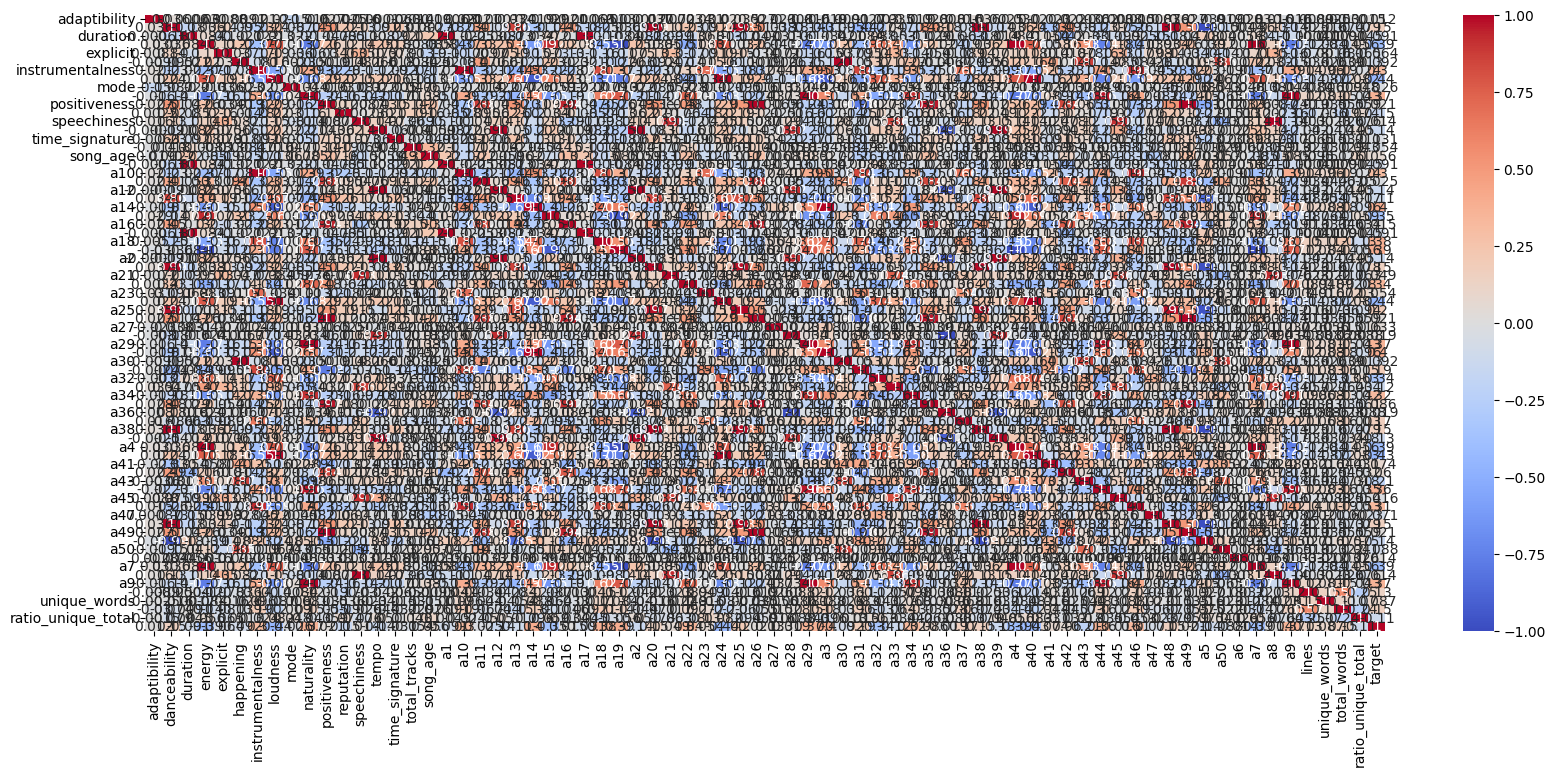

In [79]:
plt.figure(figsize=(20,8))
sns.heatmap(matrix, annot=True, cmap="coolwarm")

Removing multicolinearity

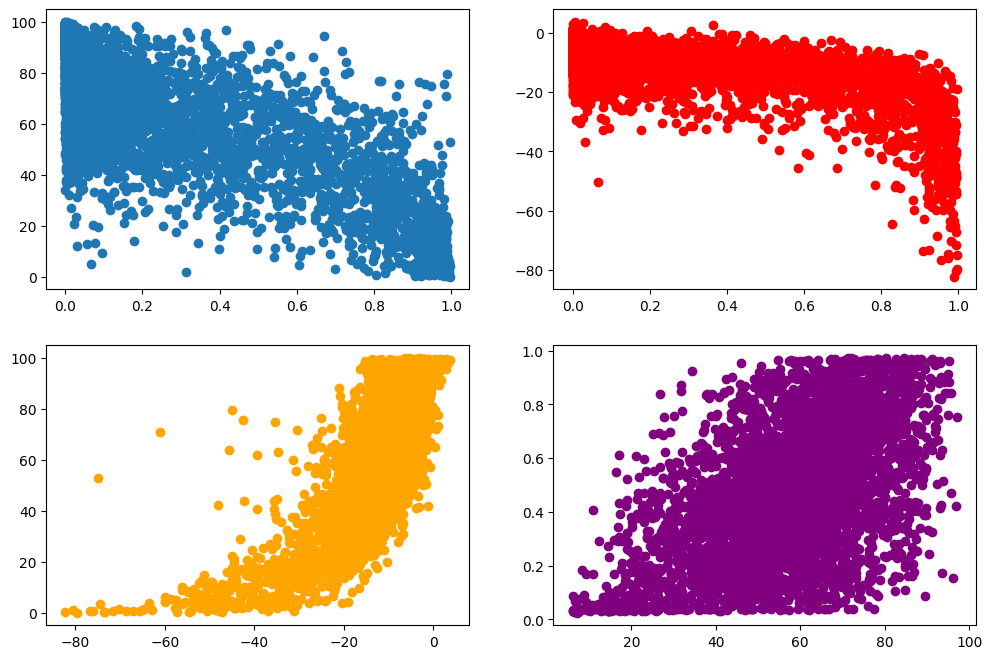

In [80]:
fig, axes= plt.subplots(2,2,figsize=(12,8))

axes[0,0].scatter(train_metadata1['naturality'], train_metadata1['energy'])
axes[0,1].scatter(train_metadata1['naturality'], train_metadata1['loudness'],color='red')
axes[1,0].scatter(train_metadata1['loudness'], train_metadata1['energy'],color='orange')
axes[1,1].scatter(train_metadata1['danceability'], train_metadata1['positiveness'],color='purple')

Creating New columns

In [81]:
train_scaled['naturality_energy_loudness']=(train_scaled['loudness']/train_scaled['energy'])*train_scaled['naturality']
train_scaled['danceability-positiveness']=train_scaled['danceability']/train_scaled['positiveness']

In [82]:
test_scaled['naturality_energy_loudness']=(test_scaled['loudness']/test_scaled['energy'])*test_scaled['naturality']
test_scaled['danceability-positiveness']=test_scaled['danceability']/test_scaled['positiveness']

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Axes: xlabel='target', ylabel='danceability-positiveness'>

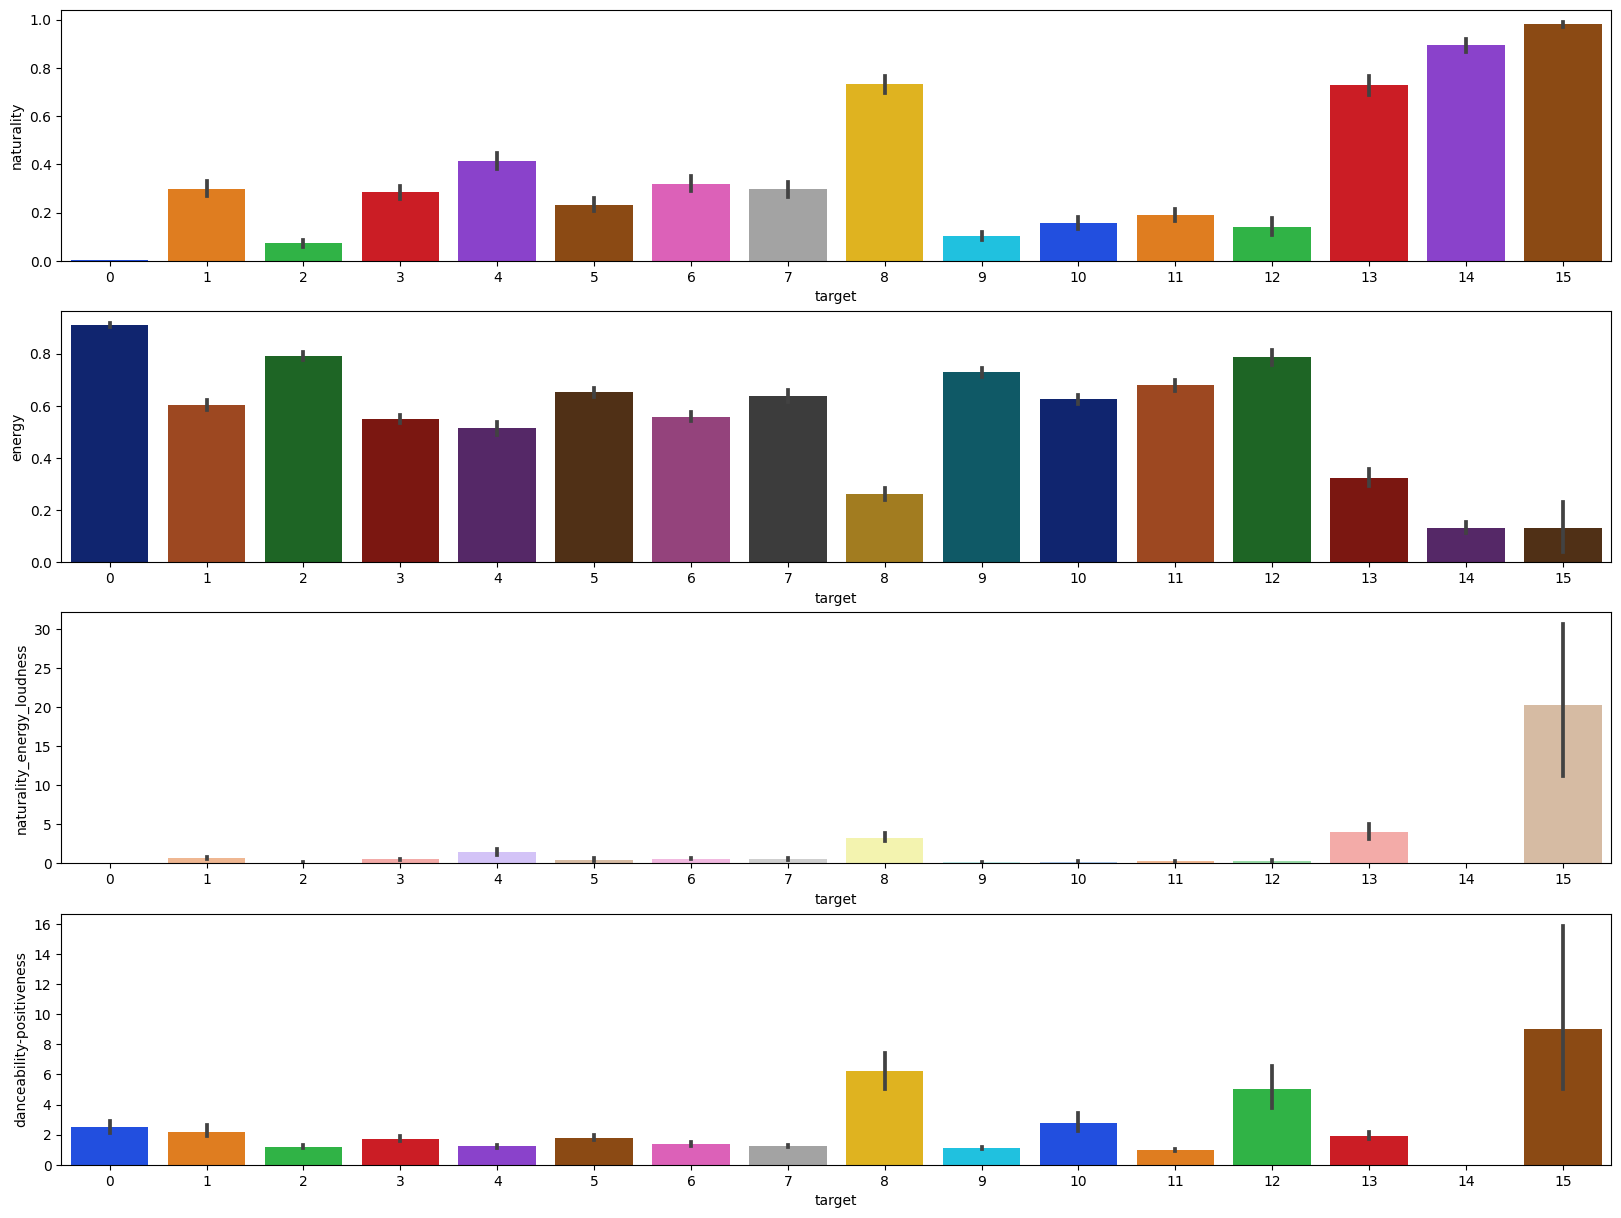

In [83]:
fig, axes= plt.subplots(4,1,figsize=(20,15))

sns.barplot(x='target',y='naturality',data=train_scaled,palette='bright',ax=axes[0])
sns.barplot(x='target',y='energy',data=train_scaled,palette='dark',ax=axes[1])
sns.barplot(x='target',y='naturality_energy_loudness',data=train_scaled,palette='pastel',ax=axes[2])
sns.barplot(x='target',y='danceability-positiveness',data=train_scaled,palette='bright',ax=axes[3])

In [84]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 74 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adaptibility                4303 non-null   float64
 1   danceability                4303 non-null   float64
 2   duration                    4303 non-null   float64
 3   energy                      4303 non-null   float64
 4   explicit                    4303 non-null   float64
 5   happening                   4303 non-null   float64
 6   instrumentalness            4303 non-null   float64
 7   loudness                    4303 non-null   float64
 8   mode                        4303 non-null   float64
 9   naturality                  4303 non-null   float64
 10  positiveness                4303 non-null   float64
 11  reputation                  4303 non-null   float64
 12  speechiness                 4303 non-null   float64
 13  tempo                       4303 

In [85]:
train_scaled.drop(['naturality','loudness','energy','danceability','positiveness'],axis=1,inplace=True)

In [86]:
test_scaled.drop(['naturality','loudness','energy','danceability','positiveness'],axis=1,inplace=True)

In [87]:
train_scaled.drop(['lines'],axis=1,inplace=True)

In [88]:
test_scaled.drop(['lines'],axis=1,inplace=True)

In [89]:
train_scaled.drop(['unique_words','total_words'],axis=1,inplace=True)

In [90]:
test_scaled.drop(['unique_words','total_words'],axis=1,inplace=True)

In [91]:
matrix_new=train_scaled.corr()

<Axes: >

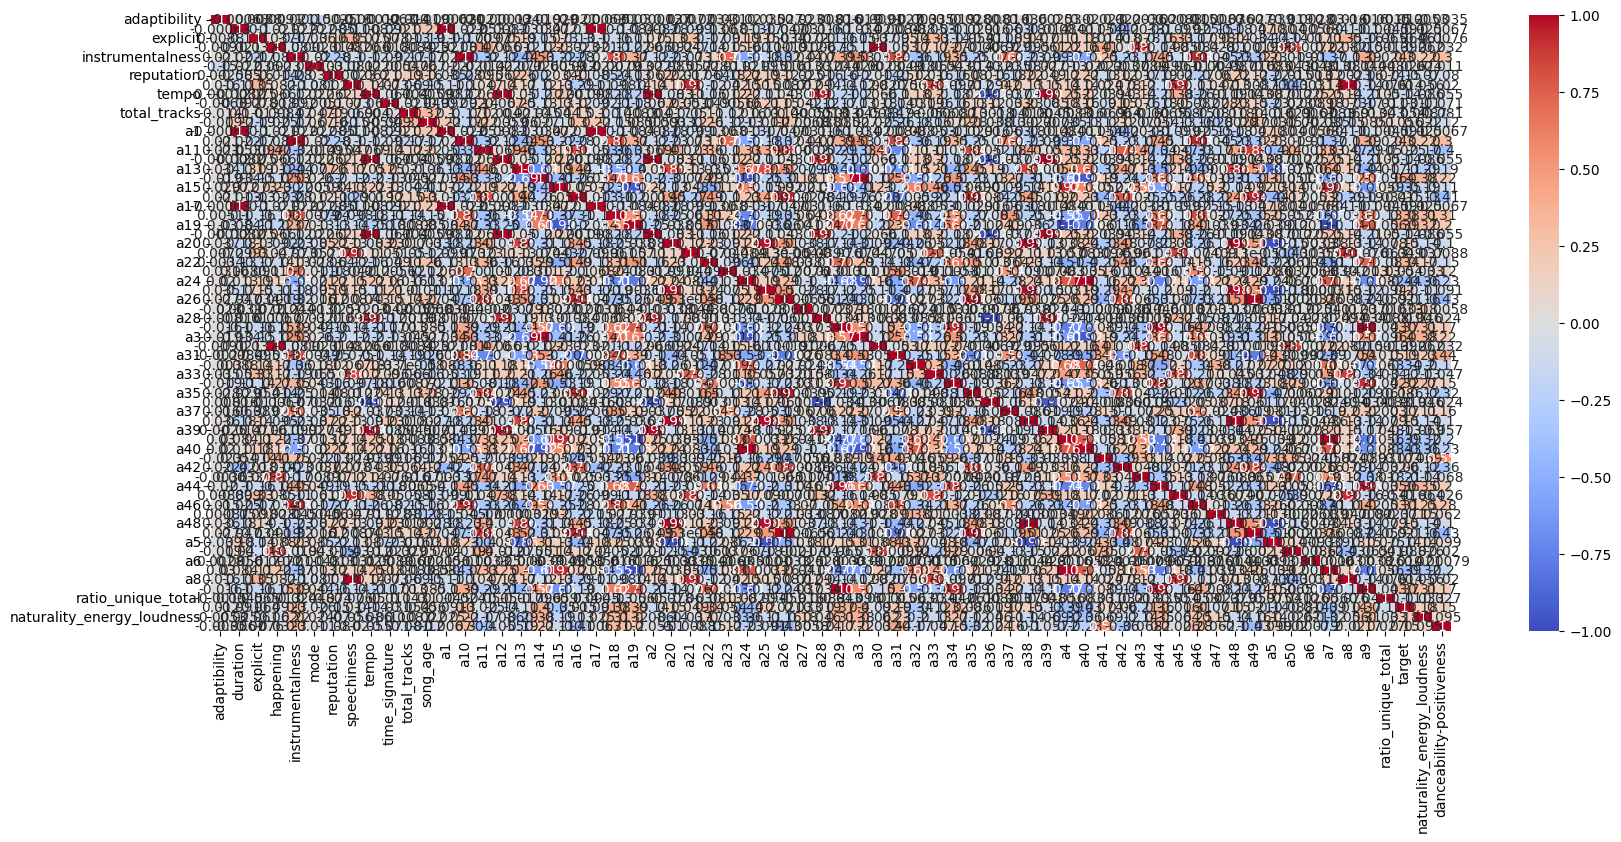

In [92]:
plt.figure(figsize=(20,8))
sns.heatmap(matrix_new, annot=True, cmap="coolwarm")

Train-Test Split

In [93]:
train_scaled=train_scaled.replace([np.inf, -np.inf], np.nan)

In [94]:
test_scaled=test_scaled.replace([np.inf, -np.inf], np.nan)

In [95]:
train_scaled.dropna(inplace=True)

In [96]:
test_scaled.dropna(inplace=True)

In [97]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4301 entries, 0 to 4302
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adaptibility                4301 non-null   float64
 1   duration                    4301 non-null   float64
 2   explicit                    4301 non-null   float64
 3   happening                   4301 non-null   float64
 4   instrumentalness            4301 non-null   float64
 5   mode                        4301 non-null   float64
 6   reputation                  4301 non-null   float64
 7   speechiness                 4301 non-null   float64
 8   tempo                       4301 non-null   float64
 9   time_signature              4301 non-null   float64
 10  total_tracks                4301 non-null   float64
 11  song_age                    4301 non-null   float64
 12  a1                          4301 non-null   float64
 13  a10                         4301 

In [98]:
train_scaled.describe()

adaptibility     duration     explicit    happening  instrumentalness  \
count   4301.000000  4301.000000  4301.000000  4301.000000       4301.000000   
mean       0.481199     0.164228     0.168565     0.168447          0.156998   
std        0.325274     0.077745     0.374411     0.143866          0.304592   
min        0.000000     0.000000     0.000000     0.000000          0.000000   
25%        0.181818     0.117092     0.000000     0.081979          0.000001   
50%        0.454545     0.153152     0.000000     0.108788          0.000392   
75%        0.727273     0.194066     0.000000     0.219542          0.085126   
max        1.000000     1.000000     1.000000     1.000000          1.000000   

              mode   reputation  speechiness        tempo  time_signature  \
count  4301.000000  4301.000000  4301.000000  4301.000000     4301.000000   
mean      0.591723     0.547422     0.076181     0.423557        0.725064   
std       0.491572     0.175482     0.100148     0.174603        0.095708   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.000000     0.420000     0.017573     0.292898        0.750000   
50%       1.000000     0.540000     0.037473     0.416826        0.750000   
75%       1.000000     0.680000     0.089030     0.532864        0.750000   
max       1.000000     1.000000     1.000000     1.000000        1.000000   

       ...           a5          a50           a6           a7           a8  \
count  ...  4301.000000  4301.000000  4301.000000  4301.000000  4301.000000   
mean   ...     0.437542     0.479102     0.490934     0.620449     0.076181   
std    ...     0.188762     0.096909     0.288635     0.251053     0.100148   
min    ...     0.000000     0.000000     0.000000     0.000249     0.000000   
25%    ...     0.305628     0.434161     0.233285     0.458447     0.017573   
50%    ...     0.423697     0.461983     0.480154     0.653647     0.037473   
75%    ...     0.552655     0.509941     0.747119     0.819816     0.089030   
max    ...     1.000000     1.000000     1.000000     1.000000     1.000000   

                a9  ratio_unique_total       target  \
count  4301.000000         4301.000000  4301.000000   
mean      0.281071            0.045141     5.508719   
std       0.323846            0.044209     4.187993   
min       0.000000            0.000000     0.000000   
25%       0.011746            0.023922     2.000000   
50%       0.125501            0.040229     5.000000   
75%       0.503011            0.057534     9.000000   
max       1.000000            1.000000    15.000000   

       naturality_energy_loudness  danceability-positiveness  
count                 4301.000000                4301.000000  
mean                     1.096476                   2.312294  
std                      5.985001                   4.558362  
min                      0.000000                   0.000000  
25%                      0.013745                   0.892530  
50%                      0.160793                   1.218566  
75%                      0.776563                   1.907799  
max                    306.837331                  78.015288  

[8 rows x 66 columns]

In [99]:
X=train_scaled.drop('target',axis=1)

In [100]:
Y=train_scaled.iloc[:,63]

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=43)
X_train.shape

(3440, 65)

In [102]:
Y_train.shape

(3440,)

In [103]:
X_test.shape

(861, 65)

In [104]:
Y_test.shape

(861,)

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20)
model1=rf.fit(X_train,Y_train)

In [106]:
df1=pd.DataFrame(model1.feature_names_in_,columns=['Names'])

In [107]:
df2=pd.DataFrame(model1.feature_importances_,columns=['Scores'])

In [108]:
model1_features=pd.concat([df1,df2],axis=1)

In [109]:
model1_features

Names    Scores
0                 adaptibility  0.008800
1                     duration  0.019678
2                     explicit  0.008735
3                    happening  0.009316
4             instrumentalness  0.021843
..                         ...       ...
60                          a8  0.014195
61                          a9  0.023893
62          ratio_unique_total  0.022241
63  naturality_energy_loudness  0.027805
64   danceability-positiveness  0.013430

[65 rows x 2 columns]

In [110]:
Y_pred=model1.predict(X_test)

In [111]:
Y_pred[0:5]

array([ 2,  9,  4, 12,  2])

In [112]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(Y_test,Y_pred)

0.5075493612078978

In [113]:
classification_report(Y_test,Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.63      0.70      0.67       104\n           1       0.30      0.36      0.33        80\n           2       0.41      0.39      0.40        94\n           3       0.33      0.54      0.41        52\n           4       0.60      0.56      0.58        73\n           5       0.53      0.61      0.57        56\n           6       0.31      0.27      0.29        64\n           7       0.49      0.46      0.47        50\n           8       0.88      0.92      0.90        49\n           9       0.48      0.30      0.37        54\n          10       0.85      0.52      0.65        42\n          11       0.21      0.18      0.19        34\n          12       0.56      0.49      0.52        45\n          13       0.54      0.41      0.46        32\n          14       0.83      1.00      0.91        30\n          15       0.50      0.50      0.50         2\n\n    accuracy                           0.51       861\n   ma

Multinomial Logistic Regression

In [114]:
X=train_scaled.drop('target',axis=1)
Y=train_scaled.iloc[:,63]

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=43)
X_train.shape

(3440, 65)

In [116]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression(multi_class='multinomial', solver='saga',penalty='l1',C=10)
model2 = lm.fit(X_train, Y_train)
x=model2.classes_
print((x))
list=[]
for i in x:
    y=model2.coef_[i]
    print(y)


list

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0.01140508  0.13512699  0.30803277  0.15847158 -0.08931595 -0.13325088
 -0.37408009  0.11850028  0.0817082   0.04880889 -0.01326427 -0.10878737
  0.13512699 -0.08931595 -0.19050457  0.0817082  -0.17700777 -0.03973546
  1.54224381 -0.31577147  0.13512699 -0.10128985 -0.79285006  0.0817082
 -0.59696907  0.00243587 -0.58691678  0.01442516  0.27861858 -0.66330017
 -0.47732409  0.         -0.00958498 -0.60820226 -0.03973546  0.15847158
  0.25747315  0.33885382  0.28799985 -0.24529574 -0.50495113  0.13983236
  0.01130214 -0.61053769  0.06848695  0.92663001  0.27357797  0.04319341
 -0.21267175  0.26073905 -0.26710329  0.09495499 -0.00947882  0.19935639
 -0.61222387 -0.47732409  0.72939384  0.09246909 -0.0408845   0.92663001
  0.11850028 -0.60820226  0.00362392 -0.97839231  0.15527334]
[-1.16679047e-01 -1.39905462e-02 -2.04855285e-01  0.00000000e+00
 -7.13994560e-02  2.38198577e-01  3.21368484e-01 -1.82206093e-01
  1.38453225e-01  1.42867770e

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[]

In [117]:
Y_pred2=lm.predict(X_test)

In [118]:
Y_pred2[0:10]

array([ 2,  9,  2,  0, 12, 11,  8,  8, 11,  6])

In [119]:
print(accuracy_score(Y_test,Y_pred2))

0.413472706155633


KNN Classifier

In [120]:
X=train_scaled.drop('target',axis=1)
Y=train_scaled['target']

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=43)

In [122]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(3440, 65) (3440,) (861, 65) (861,)


In [123]:
from sklearn.neighbors import KNeighborsClassifier
n=np.arange(3,100,1)
error_test=[]
error_train=[]
for i in n:
  knn= KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(X_train,Y_train)
  score_train=knn.score(X_train,Y_train)
  score_test=knn.score(X_test,Y_test)
  error_test.append(score_test)
  error_train.append(score_train)
print(error_train)
print(error_test)


[0.6136627906976744, 0.5877906976744186, 0.5680232558139535, 0.5453488372093023, 0.5363372093023255, 0.5252906976744186, 0.5142441860465117, 0.502906976744186, 0.49447674418604654, 0.4863372093023256, 0.4848837209302326, 0.47936046511627906, 0.4761627906976744, 0.47267441860465115, 0.46686046511627904, 0.4677325581395349, 0.4584302325581395, 0.4604651162790698, 0.45813953488372094, 0.4543604651162791, 0.45348837209302323, 0.4502906976744186, 0.4494186046511628, 0.44622093023255816, 0.44563953488372093, 0.43633720930232556, 0.4375, 0.43517441860465117, 0.438953488372093, 0.43488372093023253, 0.4340116279069767, 0.43197674418604654, 0.425, 0.42122093023255813, 0.42122093023255813, 0.4180232558139535, 0.4197674418604651, 0.41598837209302325, 0.41627906976744183, 0.4165697674418605, 0.41424418604651164, 0.4165697674418605, 0.4174418604651163, 0.4165697674418605, 0.41686046511627906, 0.413953488372093, 0.41569767441860467, 0.41627906976744183, 0.4165697674418605, 0.4104651162790698, 0.40726

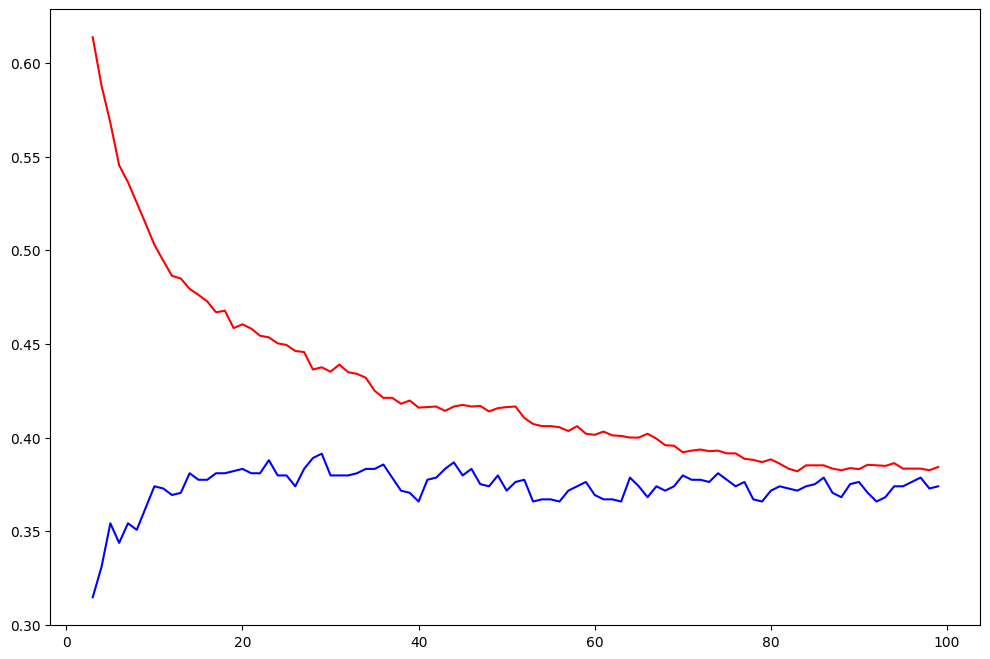

In [124]:
plt.figure(figsize=(12,8))

plt.plot(n,error_train,color='red')
plt.plot(n,error_test,color='blue')

In [125]:
test_scaled.shape

(2821, 66)

In [126]:
train_scaled.shape

(4301, 66)

In [127]:
knn=KNeighborsClassifier(n_neighbors=20)
model_knn=knn.fit(X_train,Y_train)

In [128]:
model_knn.score(X_test,Y_test)

0.3832752613240418

In [130]:
Y_pred=model_knn.predict(test_scaled.drop('song_id',axis=1))

In [131]:
Y_pred=pd.DataFrame(Y_pred,columns=['Target'])

In [132]:
test_scaled=pd.concat([test_scaled,Y_pred],axis=1)

In [133]:
test_scaled['Target']=test_scaled['Target'].replace({0:'Metal',
1:'Indie',
2:'Rock',
3:'R&B',
4:'Blues',
5:'Pop',
6:'Soul',
7:'Country',
8:'Lofi',
9:'Disco',
10:'HipHop',
11:'Funk',
12:'EDM',
13:'Jazz',
14:'Ambient',
15:'Classical'})

In [134]:
test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2678
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adaptibility                2821 non-null   float64
 1   duration                    2821 non-null   float64
 2   explicit                    2821 non-null   float64
 3   happening                   2821 non-null   float64
 4   instrumentalness            2821 non-null   float64
 5   mode                        2821 non-null   float64
 6   reputation                  2821 non-null   float64
 7   speechiness                 2821 non-null   float64
 8   tempo                       2821 non-null   float64
 9   time_signature              2821 non-null   float64
 10  total_tracks                2821 non-null   float64
 11  song_age                    2821 non-null   float64
 12  a1                          2821 non-null   float64
 13  a10                         2821 

In [136]:
output=test_scaled[['song_id','Target']]

In [137]:
output.to_csv('/content/output.csv')